In [7]:
import cv2
import numpy as np
import os
from PIL import Image
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [86]:
image_path ='Cucumber\-1_jpg.rf.d24a59e7f11eb3fb0491f5a9bd621d48.jpg'
image = cv2.imread(image_path)
image = image/255.0
image

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0

In [87]:
df = pd.read_csv('Cucumber\\annotations.csv')
df.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,-126_jpg.rf.1d5d8a75f169132d98d38d21675d3d26.jpg,640,640,Cucumber,38,97,418,593
1,-126_jpg.rf.1d5d8a75f169132d98d38d21675d3d26.jpg,640,640,Cucumber,378,297,640,639
2,-126_jpg.rf.1d5d8a75f169132d98d38d21675d3d26.jpg,640,640,Cucumber,533,0,640,367
3,-126_jpg.rf.1d5d8a75f169132d98d38d21675d3d26.jpg,640,640,Cucumber,242,0,606,313
4,-126_jpg.rf.1d5d8a75f169132d98d38d21675d3d26.jpg,640,640,Cucumber,0,405,309,639


In [88]:
new_size = (224, 224)

resized_image = cv2.resize(image, new_size)

[[47, 43, 162, 630],
 [172, 36, 326, 622],
 [419, 40, 590, 594],
 [43, 26, 598, 635]]

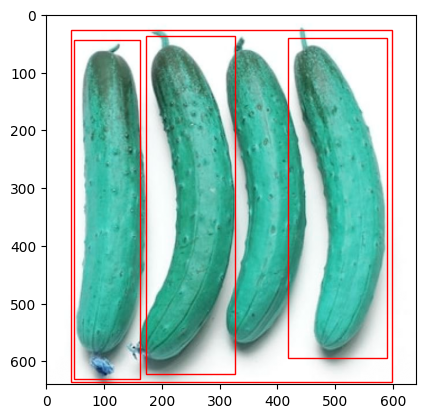

In [89]:
boxes = []

for index, row in df.iterrows() :
    if df['filename'][index] == '-1_jpg.rf.d24a59e7f11eb3fb0491f5a9bd621d48.jpg':
        temp_box = []
        temp_box.append(row['xmin'])
        temp_box.append(row['ymin'])
        temp_box.append(row['xmax'])
        temp_box.append(row['ymax'])
        boxes.append(temp_box)

fig, ax = plt.subplots(1)

ax.imshow(image)

for box in boxes:
    rect = patches.Rectangle((box[0], box[1]),
                                     box[2] - box[0],
                                     box[3] - box[1],
                                     linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show

In [90]:
width_scale = 224.0/ori_width
height_scale = 224.0/ori_height

<function matplotlib.pyplot.show(close=None, block=None)>

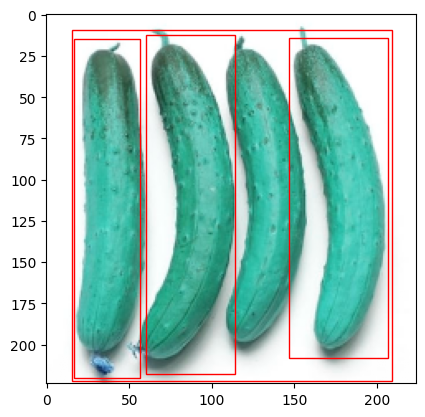

In [91]:
scaled_boxes = []

for box in boxes:
    scaled_box = [
                box[0] * width_scale,
                box[1] * height_scale,
                box[2] * width_scale,
                box[3] * height_scale,
            ]
    scaled_boxes.append(scaled_box)

fig, ax = plt.subplots(1)

ax.imshow(resized_image)


for box in scaled_boxes:
    rect = patches.Rectangle((box[0], box[1]),
                                     box[2] - box[0],
                                     box[3] - box[1],
                                     linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show